# K-Means Clustering Algorithm
**Author**: James Chen, School of Animal Sciences, Virginia Tech

**Date**: July 21, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from image_handler import load_img, save_img

In [145]:
k = 2
n = 50
N = n * k
means = [[40, 40], [60, 70]]
stds = [[[80, 0],
         [0, 70]],
        [[60, 10],
         [10, 90]]]
data = []
for mean, std in zip(means, stds):
    data += [np.random.multivariate_normal(mean=mean, cov=std, size=n)]
data = np.concatenate(data)
print("Shape: ", data.shape)
print(data)

Shape:  (100, 2)
[[30.14402564 45.67217607]
 [40.23870002 34.71092512]
 [52.73774086 64.53937568]
 [38.06118269 61.79568916]
 [43.55316297 47.03702459]
 [49.71094656 38.52462614]
 [45.66250623 50.45348107]
 [41.28448653 42.96025657]
 [30.606651   29.04241679]
 [51.51695107 40.36559962]
 [33.52990202 45.84506171]
 [43.55659515 54.40743311]
 [40.84202826 34.46278047]
 [31.12305663 45.54094154]
 [36.76662396 34.16301738]
 [57.42342015 27.53479021]
 [22.2279641  51.51537009]
 [37.69890601 47.55994728]
 [24.10060609 50.6072102 ]
 [36.02617903 37.60354311]
 [46.19260955 38.47049089]
 [34.16416623 38.90157768]
 [27.40011253 45.2131028 ]
 [49.51442221 27.07143856]
 [43.81674302 50.26793956]
 [44.70648794 55.36168513]
 [42.52266007 27.59795492]
 [24.11380067 34.18607084]
 [51.93914532 44.13805643]
 [28.41656383 53.94666558]
 [42.11843836 42.05500559]
 [43.03018285 47.76643714]
 [35.54891124 30.9381831 ]
 [42.96731844 49.44757803]
 [32.78693984 51.08226911]
 [45.01050857 32.63997208]
 [51.211884

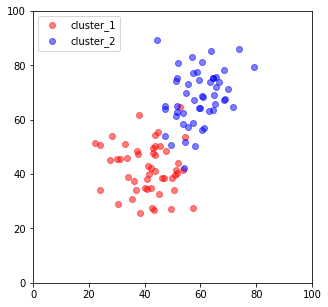

In [202]:
plt.figure(figsize=(5, 5))
plt.scatter(data[:n, 0], data[:n, 1], c="red", alpha=.5, label="cluster_1")
plt.scatter(data[n:, 0], data[n:, 1], c="blue", alpha=.5, label="cluster_2")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()

### Randomly initialize centroids

In [149]:
centroids = data[np.random.choice(N, k)]

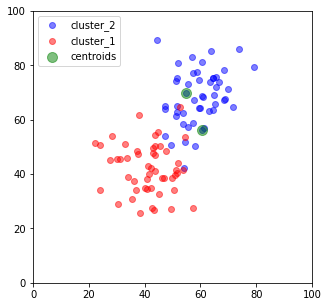

In [225]:
# plotting
plt.figure(figsize=(5, 5))
plt.scatter(data[:n, 0], data[:n, 1], c="red", alpha=.5, label="cluster_1")
plt.scatter(data[n:, 0], data[n:, 1], c="blue", alpha=.5, label="cluster_2")
plt.scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=.5, s=100, label="centroids")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend()

### Calculate distance

In [173]:
x = np.array([0, 0])
y = np.array([3, 4])
def euclidean_distance(x, y):
    return np.sum((x - y) ** 2) ** .5
print("the distance is: ", euclidean_distance(x, y))

the distance is:  5.0


### Assignment stage

In [174]:
N = len(data)
k = len(centroids)
distances = np.zeros((N, k))
for i, x in enumerate(data):
    for j, center in enumerate(centroids):
        distances[i, j] = euclidean_distance(x, center)
labels = np.argmin(distances, axis=1)
print("Assigned cluster: \n", labels)

Assigned cluster: 
 [1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1
 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0]


### Update stage

In [175]:
new_centroids = np.zeros((k, 2))
for i in range(k):
    new_centroids[i] = data[labels == i].mean(axis=0)
print("New center: \n", new_centroids)


New center: 
 [[56.19094165 70.91040756]
 [46.37338362 44.76249242]]


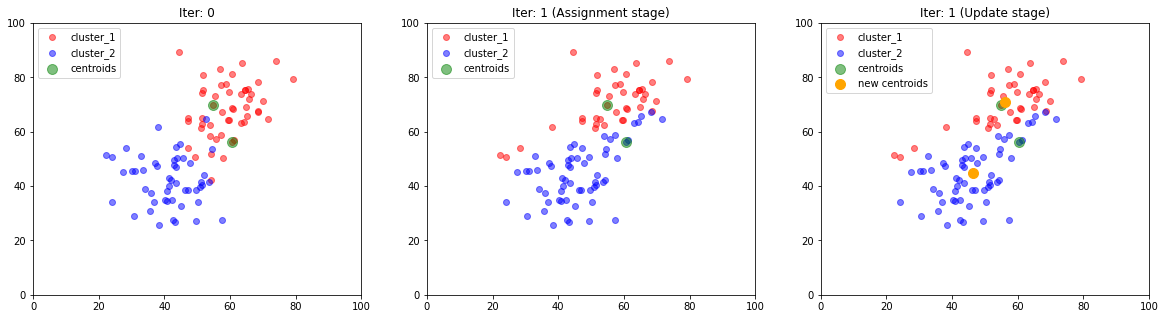

In [204]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
#
axes[0].set_title("Iter: 0")
axes[0].scatter(data[n:, 0], data[n:, 1], c="red", alpha=.5, label="cluster_1")
axes[0].scatter(data[:n, 0], data[:n, 1], c="blue", alpha=.5, label="cluster_2")
axes[0].scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=.5, s=100, label="centroids")
#
axes[1].set_title("Iter: 1 (Assignment stage)")
axes[1].scatter(data[labels==0, 0], data[labels==0, 1], c="red", alpha=.5, label="cluster_1")
axes[1].scatter(data[labels==1, 0], data[labels==1, 1], c="blue", alpha=.5, label="cluster_2")
axes[1].scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=.5, s=100, label="centroids")
#
axes[2].set_title("Iter: 1 (Update stage)")
axes[2].scatter(data[labels==0, 0], data[labels==0, 1], c="red", alpha=.5, label="cluster_1")
axes[2].scatter(data[labels==1, 0], data[labels==1, 1], c="blue", alpha=.5, label="cluster_2")
axes[2].scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=.5, s=100, label="centroids")
axes[2].scatter(new_centroids[:, 0], new_centroids[:, 1], c="orange", alpha=1, s=100, label="new centroids")
#
for i in range(3):
    axes[i].set_xlim(0, 100)
    axes[i].set_ylim(0, 100)
    axes[i].legend()

In [213]:
def kmeans(X, k, niter=20):
    n = len(X)
    centers = X[np.random.choice(n, k)]
    for i in range(niter):
        labels = assignment(X, centers)
        centers = update(X, labels, k)
    return dict(labels=labels, centers=centers)

def euclidean_distance(x, y):
    return np.sum((x - y) ** 2) ** .5

def assignment(X, centers):
    n = len(X)
    k = len(centers)
    distances = np.zeros((n, k))
    for i, x in enumerate(X):
        for j, center in enumerate(centers):
            distances[i, j] = euclidean_distance(x, center)
    labels = np.argmin(distances, axis=1)
    return labels

def update(X, labels, k):
    n, p = X.shape
    new_centers = np.zeros((k, p))
    for i in range(k):
        new_centers[i] = X[labels == i].mean(axis=0)
    return new_centers

In [218]:
kmean = kmeans(data, 2, niter=10)
kmean

{'labels': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]),
 'centers': array([[41.87421519, 42.22188329],
        [59.80228252, 69.88097943]])}

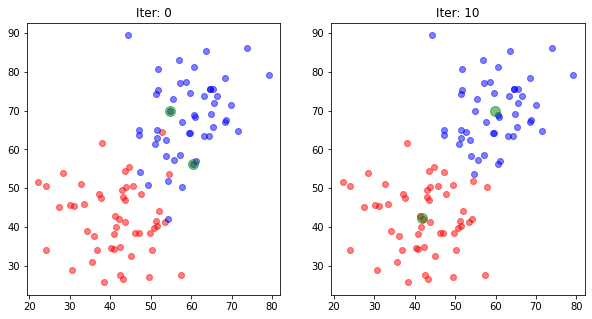

In [226]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
#
axes[0].set_title("Iter: 0")
axes[0].scatter(data[:n, 0], data[:n, 1], c="red", alpha=.5, label="cluster_1")
axes[0].scatter(data[n:, 0], data[n:, 1], c="blue", alpha=.5, label="cluster_2")
axes[0].scatter(centroids[:, 0], centroids[:, 1], c="green", alpha=.5, s=100, label="centroids")
# 
axes[1].set_title("Iter: 10")
axes[1].scatter(data[kmean["labels"]==0, 0], data[kmean["labels"]==0, 1], c="red", alpha=.5, label="cluster_1")
axes[1].scatter(data[kmean["labels"]==1, 0], data[kmean["labels"]==1, 1], c="blue", alpha=.5, label="cluster_2")
axes[1].scatter(kmean["centers"][:, 0], kmean["centers"][:, 1], c="green", alpha=.5, s=100, label="centroids")
#

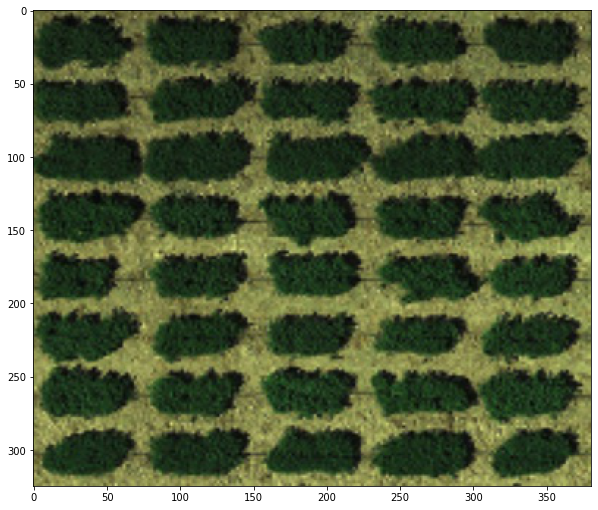

In [2]:
img = load_img("plots.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [3]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [4]:
df = pd.DataFrame(img.reshape((-1, 3)))
df.columns = ["red", "green", "blue"]
df.loc[:, "color"] = ["rgb(%d, %d, %d)" % tuple(row.values.tolist())  for _, row in df.iterrows()]


In [9]:
trace = go.Scatter3d(x=df.red, y=df.green, z=df.blue)
layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

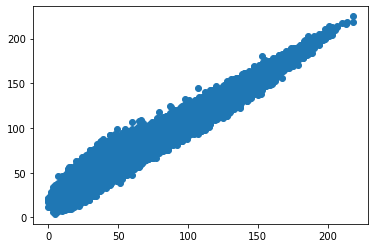

In [10]:
plt.scatter(img[:, :, 0], img[:, :, 1])